<a href="https://colab.research.google.com/github/2series/100_Days_of_ML_Code/blob/master/Loan_Prediction(Bivariate_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
!pip install analytics

In [36]:
#upload dataset
from google.colab import files
files.upload()

Saving Sample_Submission_ZAuTl8O_FK3zQHh.csv to Sample_Submission_ZAuTl8O_FK3zQHh (1).csv
Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN (2).csv
Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i (1).csv


{'Sample_Submission_ZAuTl8O_FK3zQHh.csv': b'Loan_ID,Loan_Status\r\n',
 'test_Y3wMUE5_7gLdaTN.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001

In [0]:
#reading data
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [0]:
#copy of train and test data
train_original=train.copy()
test_original=test.copy()

After looking at every variable individually in **Univariate Analysis**, we now explore them again the **target variable**.

**Categorical Independent Variable vs Target Variable**
Firstly, lets find the relation between **target variable** and **categorical independent variables**. 

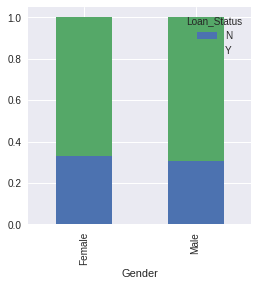

In [39]:
#Looking at the stacked bar plot, gives us the proportion of Approved and Unapproved loans
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of Female and Male applicants is more or less the same for both approved and unapproved loans.

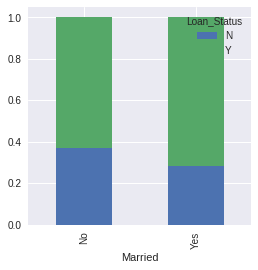

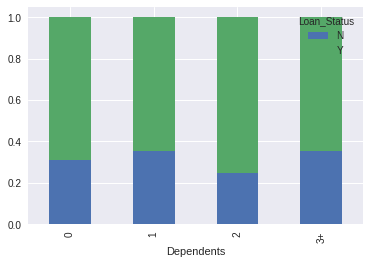

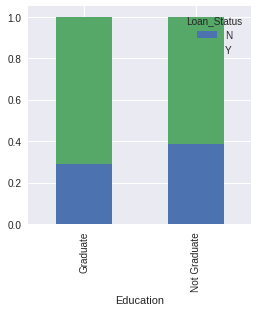

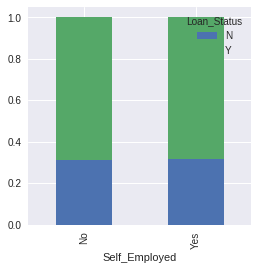

In [40]:
#let's visualize the remaining categorical variables vs target variable
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans.

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

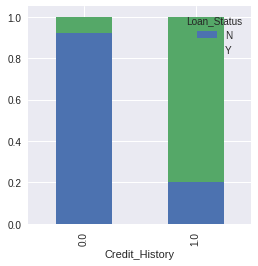

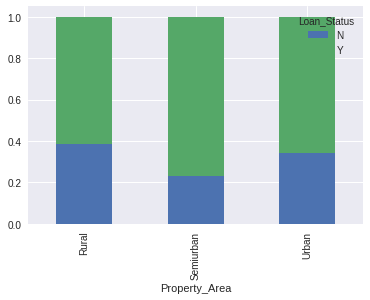

In [41]:
#Let's look at the relationship between remaining categorical independent variables and Loan_Status.
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

It seems people with credit history as 1 are more likely to get their loans approved.

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

**Numerical Independent Variable** vs **Target Variable**
Find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

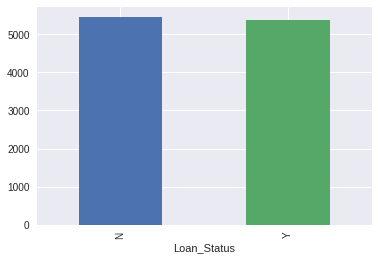

In [42]:
#Let’s visualize numerical independent variables and target variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. 
We don’t see any changes in the mean income. 

In [0]:
#Let's make bins for the applicant income variable based on the values in it and analyse the corresponding loan status for each bin
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(['ApplicantIncome'],bins,labels=group)

In [45]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

ValueError: ignored

In [0]:
#Let's analyze the coapplicant income and loan amount variable in similar manner
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(['CoapplicantIncome'],bins,labels=group)

In [47]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

ValueError: ignored

In [0]:
#Let's combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [0]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

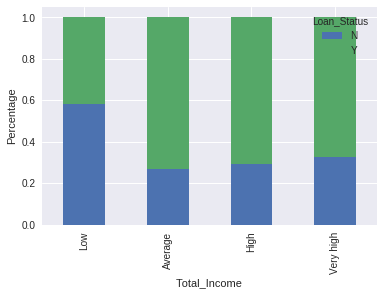

In [50]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very small as compared to that of applicants with Average, High and Very High Income.

In [0]:
#Let’s visualize the Loan amount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(['LoanAmount'],bins,labels=group)

In [53]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

ValueError: ignored

In [54]:
#Let’s drop the bins which we created for the exploration part.
#We will change the 3+ in dependents variable to 3 to make it a numerical variable.
#We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 
#One more reason to do so is few models like logistic regression takes only numeric values as input.
#We will replace N with 0 and Y with 1.
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

ValueError: ignored

In [0]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

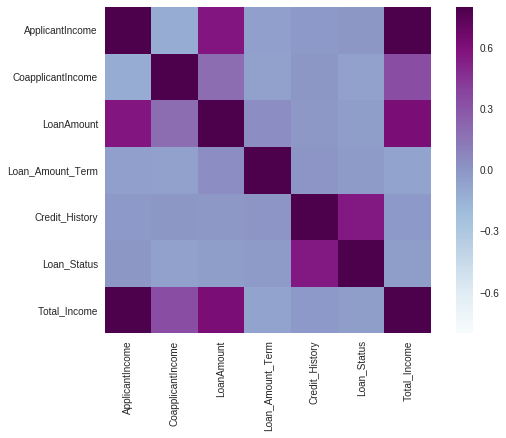

In [56]:
#Now lets look at the correlation between all the numerical variables.
#We will use the heat map to visualize the correlation. 
#Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.